In [2]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = (SparkSession.builder
         .appName("BigDataAnalysis")
         .config("spark.driver.memory", "8g")
         .getOrCreate())

spark


In [3]:
df = spark.read.csv("accepted_2007_to_2018Q4.csv", header=True, inferSchema=True).limit(200)
df.show()


+--------+---------+---------+-----------+---------------+----------+--------+-----------+-----+---------+--------------------+----------+--------------+----------+-------------------+--------+-----------+----------+--------------------+----+------------------+--------------------+--------+----------+-----+-----------+----------------+--------------+---------------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+------------------+---------------+---------------+-------------+------------------+----------+-----------------------+------------+---------------+------------+------------------+--------------------+-------------------+--------------------------+---------------------------+-----------+----------------+----------------+---------+-------------------------+--------------+------------+-----------+-----------+-----------+-----------+-----------+------------------+------------+-

In [4]:
df.printSchema()
df.show(5)


root
 |-- id: string (nullable = true)
 |-- member_id: string (nullable = true)
 |-- loan_amnt: double (nullable = true)
 |-- funded_amnt: double (nullable = true)
 |-- funded_amnt_inv: double (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- installment: double (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_title: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: string (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- issue_d: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- pymnt_plan: string (nullable = true)
 |-- url: string (nullable = true)
 |-- desc: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- title: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: string 

In [5]:
# Giả sử df là Spark DataFrame
df_sample = df.limit(10000).toPandas()
df_sample.head()
#cái này là đọc file dữ liệu nhé

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,None,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,None,None,Cash,N,None,None,None,None,None,None
1,68355089,None,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,None,None,Cash,N,None,None,None,None,None,None
2,68341763,None,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,None,None,Cash,N,None,None,None,None,None,None
3,66310712,None,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,None,None,Cash,N,None,None,None,None,None,None
4,68476807,None,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,None,None,Cash,N,None,None,None,None,None,None


In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
import pandas as pd
import numpy as np

# Khởi tạo Spark session
spark = SparkSession.builder \
    .appName("Credit Risk Analysis") \
    .getOrCreate()

# Load dữ liệu
df = spark.read.csv("accepted_2007_to_2018Q4.csv", header=True, inferSchema=True)

print(f"Số dòng: {df.count()}")
print(f"Số cột: {len(df.columns)}")

Số dòng: 2260701
Số cột: 151


In [7]:
df_sample.info()              # Thông tin tổng quan
df_sample.describe()          # Thống kê mô tả cho cột số
df_sample.describe(include='object')  # Cho cột dạng chuỗi
df_sample.isnull().sum()      # Số lượng giá trị null


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 151 entries, id to settlement_term
dtypes: float64(53), object(98)
memory usage: 236.1+ KB


id                         0
member_id                200
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
                        ... 
settlement_status        193
settlement_date          193
settlement_amount        193
settlement_percentage    193
settlement_term          193
Length: 151, dtype: int64

### TIỀN XỬ LÝ DỮ LIỆU

## Kiểm tra gt thiếu 

In [8]:
from pyspark.sql.functions import col, sum as spark_sum
import pandas as pd

# Đếm số lượng null trong từng cột
null_counts = df.select([
    spark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns
])

# Chuyển sang Pandas để hiển thị đẹp
null_df = null_counts.toPandas().T
null_df.columns = ["Số giá trị thiếu"]
null_df = null_df.sort_values(by="Số giá trị thiếu", ascending=False)

# Hiển thị 20 cột có nhiều giá trị thiếu nhất
print(null_df.head(20))


                                            Số giá trị thiếu
member_id                                            2260701
orig_projected_additional_accrued_interest           2252048
hardship_last_payment_amount                         2249783
hardship_payoff_balance_amount                       2249783
hardship_loan_status                                 2249777
hardship_dpd                                         2249777
hardship_start_date                                  2249775
hardship_length                                      2249774
hardship_end_date                                    2249772
payment_plan_start_date                              2249771
hardship_amount                                      2249766
deferral_term                                        2249760
hardship_status                                      2249744
hardship_reason                                      2249738
hardship_type                                        2249725
settlement_term         

## Kiểm tra cấu trúc và các cột chính

In [9]:
# Xem cấu trúc dữ liệu (kiểu dữ liệu của từng cột)
df.printSchema()

# Hiển thị 5 dòng đầu để hiểu dạng dữ liệu
df.show(5, truncate=False)


root
 |-- id: string (nullable = true)
 |-- member_id: string (nullable = true)
 |-- loan_amnt: double (nullable = true)
 |-- funded_amnt: double (nullable = true)
 |-- funded_amnt_inv: double (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- installment: double (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_title: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: string (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- issue_d: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- pymnt_plan: string (nullable = true)
 |-- url: string (nullable = true)
 |-- desc: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- title: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: string 

In [10]:
# Chọn các cột quan trọng cho mô hình
cols_to_keep = [
    "loan_amnt", "term", "int_rate", "installment", "grade", "sub_grade",
    "emp_length", "home_ownership", "annual_inc", "verification_status",
    "purpose", "dti", "delinq_2yrs", "fico_range_low", "fico_range_high",
    "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc",
    "loan_status"
]

df_selected = df.select(cols_to_keep)

# Chuẩn hóa cột loan_status thành nhãn 0/1
from pyspark.sql.functions import when

df_clean = df_selected.withColumn(
    "loan_status",
    when(col("loan_status").isin(
        "Fully Paid", "Does not meet the credit policy. Status:Fully Paid"), 0)
    .when(col("loan_status").isin(
        "Charged Off", "Default", "Late (31-120 days)", 
        "Does not meet the credit policy. Status:Charged Off"), 1)
    .otherwise(None)
)

# Loại bỏ các dòng không có nhãn (None)
df_clean = df_clean.na.drop(subset=["loan_status"])

print(f"Số dòng sau khi làm sạch: {df_clean.count()}")
df_clean.groupBy("loan_status").count().show()


Số dòng sau khi làm sạch: 1369565
+-----------+-------+
|loan_status|  count|
+-----------+-------+
|          1| 290826|
|          0|1078739|
+-----------+-------+



In [11]:
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import regexp_replace

# 1️⃣ Chuyển cột term thành số
df_clean = df_clean.withColumn("term", regexp_replace(col("term"), " months", "").cast("int"))

# 2️⃣ Chuẩn hóa cột emp_length (thành số năm)
df_clean = df_clean.withColumn(
    "emp_length",
    regexp_replace(col("emp_length"), " years", "")
)
df_clean = df_clean.withColumn(
    "emp_length",
    regexp_replace(col("emp_length"), " year", "")
)
df_clean = df_clean.withColumn(
    "emp_length",
    when(col("emp_length") == "10+", 10)
    .when(col("emp_length") == "< 1", 0)
    .otherwise(col("emp_length").cast("double"))
)

# 3️⃣ Chuyển annual_inc, dti, revol_util về dạng số
numeric_cols = ["annual_inc", "dti", "revol_util"]
for c in numeric_cols:
    df_clean = df_clean.withColumn(c, col(c).cast("double"))

# 4️⃣ Mã hóa các cột phân loại
categorical_cols = ["grade", "home_ownership", "verification_status", "purpose"]
indexers = [StringIndexer(inputCol=c, outputCol=c+"_index").fit(df_clean) for c in categorical_cols]

for indexer in indexers:
    df_clean = indexer.transform(df_clean)

# Kiểm tra lại dữ liệu sau xử lý
df_clean.select(
    "term", "emp_length", "annual_inc", "grade", "grade_index",
    "home_ownership", "home_ownership_index", "purpose", "purpose_index"
).show(10)


+----+----------+----------+-----+-----------+--------------+--------------------+------------------+-------------+
|term|emp_length|annual_inc|grade|grade_index|home_ownership|home_ownership_index|           purpose|purpose_index|
+----+----------+----------+-----+-----------+--------------+--------------------+------------------+-------------+
|  36|      10.0|   55000.0|    C|        1.0|      MORTGAGE|                 0.0|debt_consolidation|          0.0|
|  36|      10.0|   65000.0|    C|        1.0|      MORTGAGE|                 0.0|    small_business|          6.0|
|  60|      10.0|   63000.0|    B|        0.0|      MORTGAGE|                 0.0|  home_improvement|          2.0|
|  60|       3.0|  104433.0|    F|        5.0|      MORTGAGE|                 0.0|    major_purchase|          4.0|
|  36|       4.0|   34000.0|    C|        1.0|          RENT|                 1.0|debt_consolidation|          0.0|
|  36|      10.0|  180000.0|    B|        0.0|      MORTGAGE|           

In [12]:
import pandas as pd
import glob

# Đường dẫn thư mục chứa file CSV
path = "export/credit_risk_clean_final_csv"

# Lấy danh sách tất cả file .csv trong thư mục (Spark thường sinh ra 1 file hoặc vài file part-xxxx.csv)
csv_files = glob.glob(path + "/*.csv")

print("Các file CSV tìm thấy:", csv_files)

# Đọc tất cả các file .csv (nếu có nhiều part, sẽ gộp lại)
df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)

print("✅ Đã đọc xong dữ liệu vào pandas!")
print("Kích thước DataFrame:", df.shape)
df.head(20)


Các file CSV tìm thấy: ['export/credit_risk_clean_final_csv\\part-00000-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00001-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00002-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00003-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00004-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00005-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00006-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00007-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00008-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00009-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_r

,loan_amnt_imp,term_imp,int_rate_imp,installment_imp,emp_length_imp,annual_inc_imp,dti_imp,delinq_2yrs_imp,fico_range_low_imp,fico_range_high_imp,open_acc_imp,pub_rec_imp,revol_bal_imp,revol_util_imp,total_acc_imp,grade_index,home_ownership_index,verification_status_index,purpose_index,loan_status
0,3600.0,36.0,13.99,123.03,10.0,55000.0,5.91,0.0,675.0,679.0,7.0,0.0,2765.0,29.7,13.0,1.0,0.0,2.0,0.0,0
1,24700.0,36.0,11.99,820.28,10.0,65000.0,16.06,1.0,715.0,719.0,22.0,0.0,21470.0,19.2,38.0,1.0,0.0,2.0,6.0,0
2,20000.0,60.0,10.78,432.66,10.0,63000.0,10.78,0.0,695.0,699.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,2.0,2.0,0
3,10400.0,60.0,22.45,289.91,3.0,104433.0,25.37,1.0,695.0,699.0,12.0,0.0,21929.0,64.5,35.0,5.0,0.0,0.0,4.0,0
4,11950.0,36.0,13.44,405.18,4.0,34000.0,10.20,0.0,690.0,694.0,5.0,0.0,8822.0,68.4,6.0,1.0,1.0,0.0,0.0,0
5,20000.0,36.0,9.17,637.58,10.0,180000.0,14.67,0.0,680.0,684.0,12.0,0.0,87329.0,84.5,27.0,0.0,0.0,2.0,0.0,0
6,20000.0,36.0,8.49,631.26,10.0,85000.0,17.61,1.0,705.0,709.0,8.0,0.0,826.0,5.7,15.0,0.0,0.0,2.0,4.0,0
7,10000.0,36.0,6.49,306.45,6.0,85000.0,13.07,0.0,685.0,689.0,14.0,1.0,10464.0,34.5,23.0,2.0,1.0,2.0,1.0,0
8,8000.0,36.0,11.48,263.74,10.0,42000.0,34.80,0.0,700.0,704.0,8.0,0.0,7034.0,39.1,18.0,0.0,0.0,2.0,1.0,0
9,1400.0,36.0,12.88,47.10,3.0,64000.0,34.95,0.0,700.0,704.0,17.0,0.0,37828.0,67.2,24.0,1.0,0.0,2.0,3.0,0


In [13]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [14]:
import os
output_path = "D:/baocao_2/data_one.csv"

df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"✅ Đã lưu file CSV duy nhất tại: {output_path}")


✅ Đã lưu file CSV duy nhất tại: D:/baocao_2/data_one.csv


In [15]:
import pandas as pd
import glob

# Đường dẫn dữ liệu sạch (đã qua xử lý Spark)
path = "export/credit_risk_clean_final_csv"

# Lấy tất cả file part-*.csv trong thư mục
csv_files = glob.glob(path + "/*.csv")
print("Các file tìm thấy:", csv_files)

# Gộp các file lại thành một DataFrame pandas
df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)

print("✅ Đã đọc đúng dữ liệu sạch!")
print("Kích thước:", df.shape)
print(df.columns.tolist())
df.head()


Các file tìm thấy: ['export/credit_risk_clean_final_csv\\part-00000-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00001-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00002-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00003-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00004-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00005-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00006-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00007-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00008-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_clean_final_csv\\part-00009-2d5afd9a-4c25-4779-b9ac-c45842d7d315-c000.csv', 'export/credit_risk_

,loan_amnt_imp,term_imp,int_rate_imp,installment_imp,emp_length_imp,annual_inc_imp,dti_imp,delinq_2yrs_imp,fico_range_low_imp,fico_range_high_imp,open_acc_imp,pub_rec_imp,revol_bal_imp,revol_util_imp,total_acc_imp,grade_index,home_ownership_index,verification_status_index,purpose_index,loan_status
0,3600.0,36.0,13.99,123.03,10.0,55000.0,5.91,0.0,675.0,679.0,7.0,0.0,2765.0,29.7,13.0,1.0,0.0,2.0,0.0,0
1,24700.0,36.0,11.99,820.28,10.0,65000.0,16.06,1.0,715.0,719.0,22.0,0.0,21470.0,19.2,38.0,1.0,0.0,2.0,6.0,0
2,20000.0,60.0,10.78,432.66,10.0,63000.0,10.78,0.0,695.0,699.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,2.0,2.0,0
3,10400.0,60.0,22.45,289.91,3.0,104433.0,25.37,1.0,695.0,699.0,12.0,0.0,21929.0,64.5,35.0,5.0,0.0,0.0,4.0,0
4,11950.0,36.0,13.44,405.18,4.0,34000.0,10.20,0.0,690.0,694.0,5.0,0.0,8822.0,68.4,6.0,1.0,1.0,0.0,0.0,0


In [16]:
# Nếu df là Spark DataFrame, chuyển sang pandas
if not isinstance(df, pd.DataFrame):
    print("🔄 Đang chuyển dữ liệu Spark → pandas...")
    df = df.limit(1000000).toPandas()  # Giới hạn trước để tránh tràn RAM
    print("✅ Đã chuyển sang pandas:", type(df))


In [17]:
df_sample = df.sample(n=1000000, random_state=42)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Lấy mẫu 200k dòng
df_sample = df.sample(n=1000000, random_state=42)

X = df_sample.drop(columns=['loan_status'])
y = df_sample['loan_status'].astype(int)

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Chuẩn hóa
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Dữ liệu đã chia & scale xong.")


✅ Dữ liệu đã chia & scale xong.


In [20]:
import pandas as pd
import numpy as np

# 🧹 1️⃣ Giữ lại các cột có ý nghĩa tài chính mạnh
cols_keep = [
    "loan_amnt_imp", "term_imp", "int_rate_imp", "installment_imp",
    "emp_length_imp", "annual_inc_imp", "dti_imp",
    "delinq_2yrs_imp", "fico_range_low_imp", "fico_range_high_imp",
    "open_acc_imp", "pub_rec_imp", "revol_bal_imp", "revol_util_imp",
    "total_acc_imp", "grade_index", "home_ownership_index",
    "verification_status_index", "purpose_index", "loan_status"
]

df_refined = df[cols_keep].copy()


# 🧠 2️⃣ Thêm đặc trưng mới có ý nghĩa tín dụng
df_refined["fico_mean"] = (df_refined["fico_range_low_imp"] + df_refined["fico_range_high_imp"]) / 2
df_refined["debt_to_income_ratio"] = df_refined["revol_bal_imp"] / (df_refined["annual_inc_imp"] + 1)
df_refined["installment_to_income"] = df_refined["installment_imp"] / (df_refined["annual_inc_imp"] / 12 + 1)

# 🪓 3️⃣ Loại bỏ outlier nặng (các giá trị cực lớn bất thường)
num_cols = [
    "loan_amnt_imp", "int_rate_imp", "annual_inc_imp", 
    "dti_imp", "revol_bal_imp", "revol_util_imp", "fico_mean"
]

for c in num_cols:
    q1, q3 = df_refined[c].quantile(0.01), df_refined[c].quantile(0.99)
    df_refined = df_refined[(df_refined[c] >= q1) & (df_refined[c] <= q3)]

# 🧩 4️⃣ Làm sạch giá trị vô hạn (do chia cho 0)
df_refined.replace([np.inf, -np.inf], np.nan, inplace=True)
df_refined.dropna(inplace=True)

print("✅ Dữ liệu sau khi thêm đặc trưng và loại nhiễu:")
print("Kích thước mới:", df_refined.shape)
df_refined.head(10)


✅ Dữ liệu sau khi thêm đặc trưng và loại nhiễu:
Kích thước mới: (1270426, 23)


,loan_amnt_imp,term_imp,int_rate_imp,installment_imp,emp_length_imp,annual_inc_imp,dti_imp,delinq_2yrs_imp,fico_range_low_imp,fico_range_high_imp,...,revol_util_imp,total_acc_imp,grade_index,home_ownership_index,verification_status_index,purpose_index,loan_status,fico_mean,debt_to_income_ratio,installment_to_income
0,3600.0,36.0,13.99,123.03,10.0,55000.0,5.91,0.0,675.0,679.0,...,29.7,13.0,1.0,0.0,2.0,0.0,0,677.0,0.050272,0.026837
1,24700.0,36.0,11.99,820.28,10.0,65000.0,16.06,1.0,715.0,719.0,...,19.2,38.0,1.0,0.0,2.0,6.0,0,717.0,0.330303,0.151408
2,20000.0,60.0,10.78,432.66,10.0,63000.0,10.78,0.0,695.0,699.0,...,56.2,18.0,0.0,0.0,2.0,2.0,0,697.0,0.124903,0.082396
3,10400.0,60.0,22.45,289.91,3.0,104433.0,25.37,1.0,695.0,699.0,...,64.5,35.0,5.0,0.0,0.0,4.0,0,697.0,0.209980,0.033309
4,11950.0,36.0,13.44,405.18,4.0,34000.0,10.20,0.0,690.0,694.0,...,68.4,6.0,1.0,1.0,0.0,0.0,0,692.0,0.259463,0.142954
5,20000.0,36.0,9.17,637.58,10.0,180000.0,14.67,0.0,680.0,684.0,...,84.5,27.0,0.0,0.0,2.0,0.0,0,682.0,0.485158,0.042502
6,20000.0,36.0,8.49,631.26,10.0,85000.0,17.61,1.0,705.0,709.0,...,5.7,15.0,0.0,0.0,2.0,4.0,0,707.0,0.009718,0.089106
7,10000.0,36.0,6.49,306.45,6.0,85000.0,13.07,0.0,685.0,689.0,...,34.5,23.0,2.0,1.0,2.0,1.0,0,687.0,0.123104,0.043257
8,8000.0,36.0,11.48,263.74,10.0,42000.0,34.80,0.0,700.0,704.0,...,39.1,18.0,0.0,0.0,2.0,1.0,0,702.0,0.167472,0.075333
10,18000.0,60.0,19.48,471.70,7.0,150000.0,9.39,0.0,665.0,669.0,...,40.7,27.0,4.0,1.0,2.0,0.0,1,667.0,0.093679,0.037733


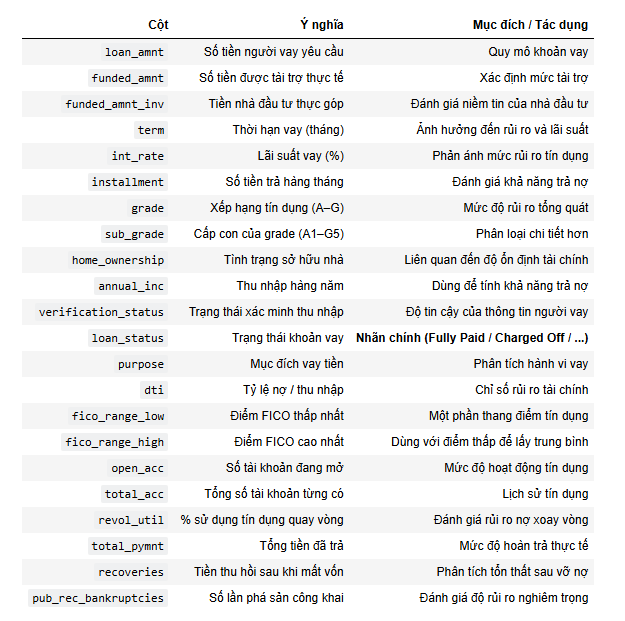

### Chia dữ liệu thành X (features) và y (label)

In [21]:
#  Chia dữ liệu thành X và y
X = df_refined.drop(columns=['loan_status'])
y = df_refined['loan_status']

print("Kích thước X:", X.shape)
print("Kích thước y:", y.shape)


Kích thước X: (1270426, 22)
Kích thước y: (1270426,)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Lấy mẫu nhỏ gọn để vẽ
df_sample = df_refined.sample(n=10000, random_state=42)

plt.figure(figsize=(12, 8))
num_cols = ['loan_amnt_imp', 'int_rate_imp', 'annual_inc_imp', 'dti_imp', 'fico_range_low_imp', 'fico_range_high_imp']

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_sample[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Phân phối của {col}', fontsize=11)
plt.tight_layout()
plt.show()


## MÔ HÌNH

### MÔ HÌNH 1 

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import builtins

# ======================================
# 1️⃣ CHUẨN BỊ DỮ LIỆU
# ======================================
df_small = df.sample(n=20000, random_state=42)
X = df_small.drop(columns=['loan_status']).astype('float32')
y = df_small['loan_status'].astype(int)

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================================
# 2️⃣ HUẤN LUYỆN MÔ HÌNH (TỐI ƯU HÓA)
# ======================================
log_reg = LogisticRegression(
    max_iter=2000,
    solver='saga',
    tol=1e-4,
    class_weight={0: 1, 1: 1.5},  # cân bằng nhẹ
    C=5.0                          # mạnh hơn
)
log_reg.fit(X_train_scaled, y_train)

y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]
threshold = 0.55
y_pred_lr = (y_prob_lr >= threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.79325
ROC-AUC: 0.704952839186366
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      3163
           1       0.53      0.12      0.20       837

    accuracy                           0.79      4000
   macro avg       0.67      0.55      0.54      4000
weighted avg       0.75      0.79      0.74      4000



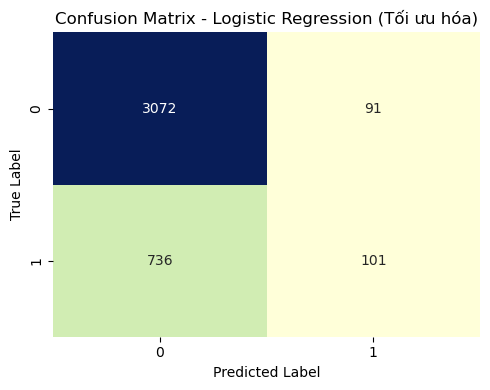

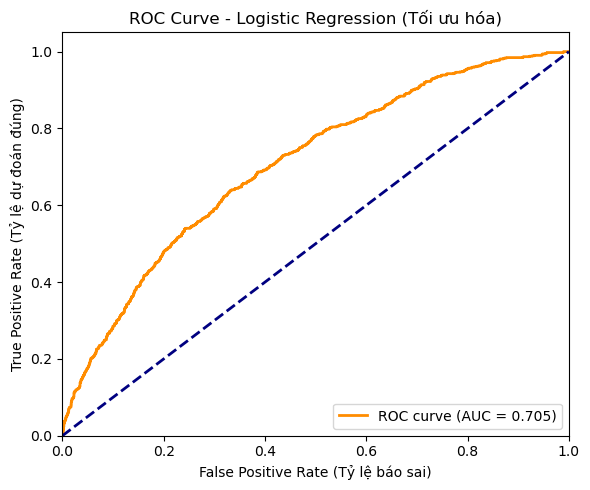

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 🎯 Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title("Confusion Matrix - Logistic Regression (Tối ưu hóa)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# 📈 Đường cong ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (Tỷ lệ báo sai)")
plt.ylabel("True Positive Rate (Tỷ lệ dự đoán đúng)")
plt.title("ROC Curve - Logistic Regression (Tối ưu hóa)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [145]:
from sklearn.metrics import accuracy_score, roc_auc_score
import builtins  # ✅ để dùng abs() chuẩn Python, tránh lỗi Spark

# 🎯 Dự đoán trên tập train/test
y_pred_train_lr = log_reg.predict(X_train_scaled)
y_prob_train_lr = log_reg.predict_proba(X_train_scaled)[:, 1]

y_pred_test_lr = log_reg.predict(X_test_scaled)
y_prob_test_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# ✅ Tính các chỉ số
train_acc = accuracy_score(y_train, y_pred_train_lr)
test_acc = accuracy_score(y_test, y_pred_test_lr)
train_roc = roc_auc_score(y_train, y_prob_train_lr)
test_roc = roc_auc_score(y_test, y_prob_test_lr)

print("📊 KẾT QUẢ TRAIN/TEST - Logistic Regression")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")
print(f"Train ROC-AUC : {train_roc:.4f}")
print(f"Test ROC-AUC  : {test_roc:.4f}")

# 💬 Gợi ý nhanh
if builtins.abs(train_acc - test_acc) < 0.05 and builtins.abs(train_roc - test_roc) < 0.05:
    print("\n✅ Mô hình ổn định, không có dấu hiệu overfitting đáng kể.")
elif train_acc > test_acc:
    print("\n⚠️ Mô hình có dấu hiệu overfitting — nên thử giảm C (tăng regularization) hoặc giảm số feature.")
else:
    print("\nℹ️ Mô hình có thể underfit — cần tăng độ phức tạp (giảm regularization hoặc thêm feature).")


📊 KẾT QUẢ TRAIN/TEST - Logistic Regression
Train Accuracy: 0.7841
Test Accuracy : 0.7893
Train ROC-AUC : 0.7016
Test ROC-AUC  : 0.7050

✅ Mô hình ổn định, không có dấu hiệu overfitting đáng kể.


## Mô hình 2

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=6, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

print("✅ Random Forest đã train xong")


✅ Random Forest đã train xong


### MH2 mới 

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import builtins

# =======================
# 1️⃣ Chuẩn bị dữ liệu
# =======================
df_small = df.sample(n=25000, random_state=42)
X = df_small.drop(columns=['loan_status']).astype('float32')
y = df_small['loan_status'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =======================
# 2️⃣ Huấn luyện mô hình
# =======================
rf_model = RandomForestClassifier(
    n_estimators=600,          # giảm số cây (bớt học thuộc)
    max_depth=6,               # giảm độ sâu → tổng quát hơn
    min_samples_split=12,      # chia node khắt khe hơn
    min_samples_leaf=8,        # mỗi lá phải có ít nhất 8 mẫu
    class_weight='balanced',   # cân bằng dữ liệu
    max_features='log2',       # giảm số đặc trưng mỗi cây → tăng đa dạng
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# =======================
# 3️⃣ Dự đoán
# =======================
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("🌲 Random Forest Classifier (Tối ưu & Cân bằng)")
print(f"Accuracy: {builtins.round(accuracy_score(y_test, y_pred_rf), 4)}")
print(f"ROC-AUC : {builtins.round(roc_auc_score(y_test, y_prob_rf), 4)}")
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred_rf))


🌲 Random Forest Classifier (Tối ưu & Cân bằng)
Accuracy: 0.6402
ROC-AUC : 0.6993

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.87      0.64      0.74      3952
           1       0.32      0.65      0.43      1048

    accuracy                           0.64      5000
   macro avg       0.60      0.64      0.58      5000
weighted avg       0.76      0.64      0.67      5000



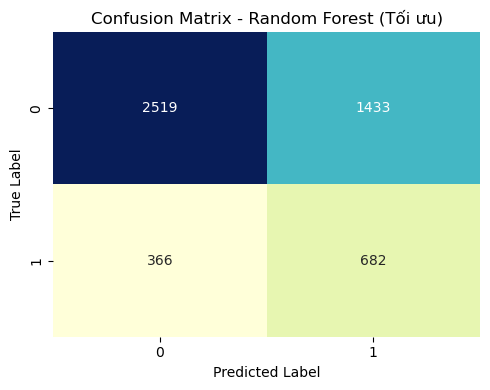

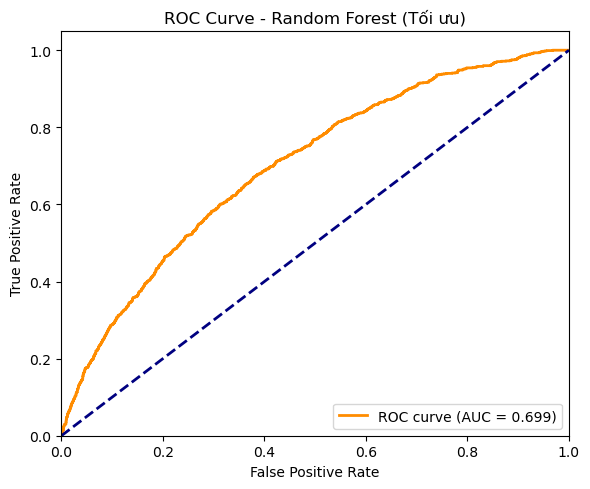

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 🎯 Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title("Confusion Matrix - Random Forest (Tối ưu)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# 📈 Đường cong ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Tối ưu)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [188]:
#  Dự đoán trên tập train
y_pred_train_rf = rf_model.predict(X_train)
y_prob_train_rf = rf_model.predict_proba(X_train)[:, 1]

#  Dự đoán trên tập test
y_pred_test_rf = rf_model.predict(X_test)
y_prob_test_rf = rf_model.predict_proba(X_test)[:, 1]

# ✅ Tính toán các chỉ số
train_acc = accuracy_score(y_train, y_pred_train_rf)
test_acc = accuracy_score(y_test, y_pred_test_rf)
train_roc = roc_auc_score(y_train, y_prob_train_rf)
test_roc = roc_auc_score(y_test, y_prob_test_rf)

print(" ĐÁNH GIÁ OVERFITTING MÔ HÌNH RANDOM FOREST")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")
print(f"Train ROC-AUC : {train_roc:.4f}")
print(f"Test ROC-AUC  : {test_roc:.4f}")

# in ket qua neu overfit se bao
if builtins.abs(train_acc - test_acc) > 0.05 or builtins.abs(train_roc - test_roc) > 0.05:
    print("\n Có dấu hiệu Overfitting nhẹ — có thể giảm max_depth hoặc tăng min_samples_split.")
else:
    print("\n Mô hình cân bằng tốt giữa Train và Test.")


 ĐÁNH GIÁ OVERFITTING MÔ HÌNH RANDOM FOREST
Train Accuracy: 0.6522
Test Accuracy : 0.6402
Train ROC-AUC : 0.7348
Test ROC-AUC  : 0.6993

 Mô hình cân bằng tốt giữa Train và Test.


### MH 3

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 🔹 Giả sử bạn đang dùng DataFrame pandas 'df' đã làm sạch
# (chứa các cột numeric và cột nhãn 'loan_status')
X = df.drop(columns=['loan_status'])
y = df['loan_status'].astype(int)

# 1️⃣ Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2️⃣ Chia dữ liệu train/test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Đã chia dữ liệu & scale xong.")
print("Số dòng train:", X_train_scaled.shape[0])
print("Số dòng test:", X_test_scaled.shape[0])


✅ Đã chia dữ liệu & scale xong.
Số dòng train: 1095652
Số dòng test: 273913


In [191]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import builtins

# Khởi tạo mô hình
xgb_model_tuned = XGBClassifier(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    scale_pos_weight=2.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='auc'
)

# Huấn luyện
xgb_model_tuned.fit(X_train_scaled, y_train)

# Dự đoán
y_pred_xgb_tuned = xgb_model_tuned.predict(X_test_scaled)
y_prob_xgb_tuned = xgb_model_tuned.predict_proba(X_test_scaled)[:, 1]

# Đánh giá
print("🌟 XGBoost Classifier (Fine-tuned)")
print("Accuracy:", builtins.round(accuracy_score(y_test, y_pred_xgb_tuned), 4))
print("ROC-AUC:", builtins.round(roc_auc_score(y_test, y_prob_xgb_tuned), 4))
print(classification_report(y_test, y_pred_xgb_tuned))


🌟 XGBoost Classifier (Fine-tuned)
Accuracy: 0.7189
ROC-AUC: 0.7221
              precision    recall  f1-score   support

           0       0.86      0.77      0.81    215748
           1       0.38      0.53      0.45     58165

    accuracy                           0.72    273913
   macro avg       0.62      0.65      0.63    273913
weighted avg       0.76      0.72      0.73    273913



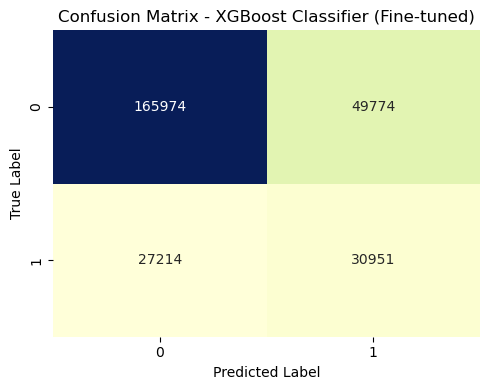

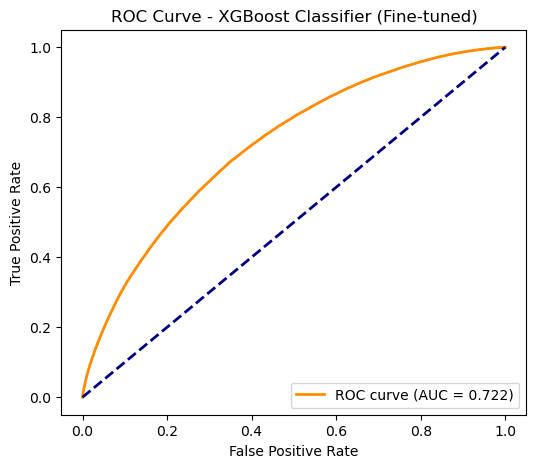

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 🎯 Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_xgb_tuned)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title("Confusion Matrix - XGBoost Classifier (Fine-tuned)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# 📈 ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb_tuned)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Classifier (Fine-tuned)")
plt.legend(loc="lower right")
plt.show()


In [193]:
import builtins
from sklearn.metrics import accuracy_score, roc_auc_score

#  Dự đoán trên tập train
y_pred_train = xgb_model_tuned.predict(X_train_scaled)
y_prob_train = xgb_model_tuned.predict_proba(X_train_scaled)[:, 1]

#  Dự đoán trên tập test
y_pred_test = y_pred_xgb_tuned
y_prob_test = y_prob_xgb_tuned

#  Tính các chỉ số
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

train_roc = roc_auc_score(y_train, y_prob_train)
test_roc = roc_auc_score(y_test, y_prob_test)

print(" ĐÁNH GIÁ OVERFITTING MÔ HÌNH XGBOOST")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")
print(f"Train ROC-AUC : {train_roc:.4f}")
print(f"Test ROC-AUC  : {test_roc:.4f}")

# 💬 Gợi ý nhanh — dùng builtins.abs() thay vì abs() của Spark
if builtins.abs(train_acc - test_acc) > 0.05 or builtins.abs(train_roc - test_roc) > 0.05:
    print("\n Có dấu hiệu Overfitting nhẹ — nên thử giảm max_depth hoặc tăng min_child_weight.")
else:
    print("\n  Mô hình cân bằng tốt giữa Train và Test.")


 ĐÁNH GIÁ OVERFITTING MÔ HÌNH XGBOOST
Train Accuracy: 0.7371
Test Accuracy : 0.7189
Train ROC-AUC : 0.7589
Test ROC-AUC  : 0.7221

  Mô hình cân bằng tốt giữa Train và Test.


### TRỰC QUAN HÓA 

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# 🔹 1️⃣ TÍNH TOÁN MA TRẬN TƯƠNG QUAN
# ================================
corr_matrix = df_refined.corr(numeric_only=True)

print("📘 MA TRẬN TƯƠNG QUAN (10 cột đầu):")
display(corr_matrix.head(10))





📘 MA TRẬN TƯƠNG QUAN (10 cột đầu):


,loan_amnt_imp,term_imp,int_rate_imp,installment_imp,emp_length_imp,annual_inc_imp,dti_imp,fico_range_low_imp,fico_range_high_imp,open_acc_imp,...,revol_util_imp,total_acc_imp,grade_index,home_ownership_index,verification_status_index,purpose_index,loan_status,fico_mean,debt_to_income_ratio,installment_to_income
loan_amnt_imp,1.000000,0.385032,0.159202,0.951754,0.088780,0.464905,0.032127,0.098859,0.098860,0.181479,...,0.120365,0.206298,0.168006,-0.138059,-0.129321,-0.148204,0.070528,0.098860,0.151416,0.489951
term_imp,0.385032,1.000000,0.425643,0.140455,0.055983,0.089206,0.071153,0.002085,0.002086,0.070409,...,0.064847,0.099231,0.324009,-0.084898,-0.089662,-0.063451,0.181039,0.002085,0.066318,0.059981
int_rate_imp,0.159202,0.425643,1.000000,0.167522,-0.000557,-0.097211,0.171053,-0.395195,-0.395196,-0.003309,...,0.229829,-0.040745,0.650446,0.048226,-0.126828,0.034291,0.260309,-0.395196,0.041574,0.266492
installment_imp,0.951754,0.140455,0.167522,1.000000,0.075726,0.446925,0.034669,0.048816,0.048816,0.170787,...,0.135406,0.181636,0.171362,-0.111604,-0.123440,-0.136379,0.054312,0.048816,0.142380,0.551923
emp_length_imp,0.088780,0.055983,-0.000557,0.075726,1.000000,0.097166,0.036294,0.016675,0.016673,0.038644,...,0.032313,0.100974,0.002574,-0.124617,0.019455,-0.028972,-0.013724,0.016674,0.053580,-0.031382
annual_inc_imp,0.464905,0.089206,-0.097211,0.446925,0.097166,1.000000,-0.222840,0.089530,0.089532,0.210710,...,0.072476,0.275871,-0.008633,-0.186296,-0.074117,0.005068,-0.057530,0.089531,-0.169531,-0.362377
dti_imp,0.032127,0.071153,0.171053,0.034669,0.036294,-0.222840,1.000000,-0.037248,-0.037248,0.285053,...,0.138389,0.225255,0.101564,0.010248,0.009628,-0.080202,0.105845,-0.037248,0.363824,0.226090
fico_range_low_imp,0.098859,0.002085,-0.395195,0.048816,0.016675,0.089530,-0.037248,1.000000,0.999998,0.028648,...,-0.404775,0.025616,-0.097900,-0.063859,0.132844,0.046308,-0.127588,1.000000,0.002271,-0.029974
fico_range_high_imp,0.098860,0.002086,-0.395196,0.048816,0.016673,0.089532,-0.037248,0.999998,1.000000,0.028648,...,-0.404776,0.025617,-0.097899,-0.063860,0.132846,0.046131,-0.127592,1.000000,0.002270,-0.029976
open_acc_imp,0.181479,0.070409,-0.003309,0.170787,0.038644,0.210710,0.285053,0.028648,0.028648,1.000000,...,-0.183567,0.697376,0.028215,-0.092725,0.007888,-0.056190,0.028777,0.028648,0.179286,-0.031675


C:\Users\MY PC\AppData\Local\Temp\ipykernel_9096\1504472050.py:13: UserWarning: Glyph 128262 (\N{HIGH BRIGHTNESS SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MY PC\anaconda3\envs\creditrisk\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128262 (\N{HIGH BRIGHTNESS SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


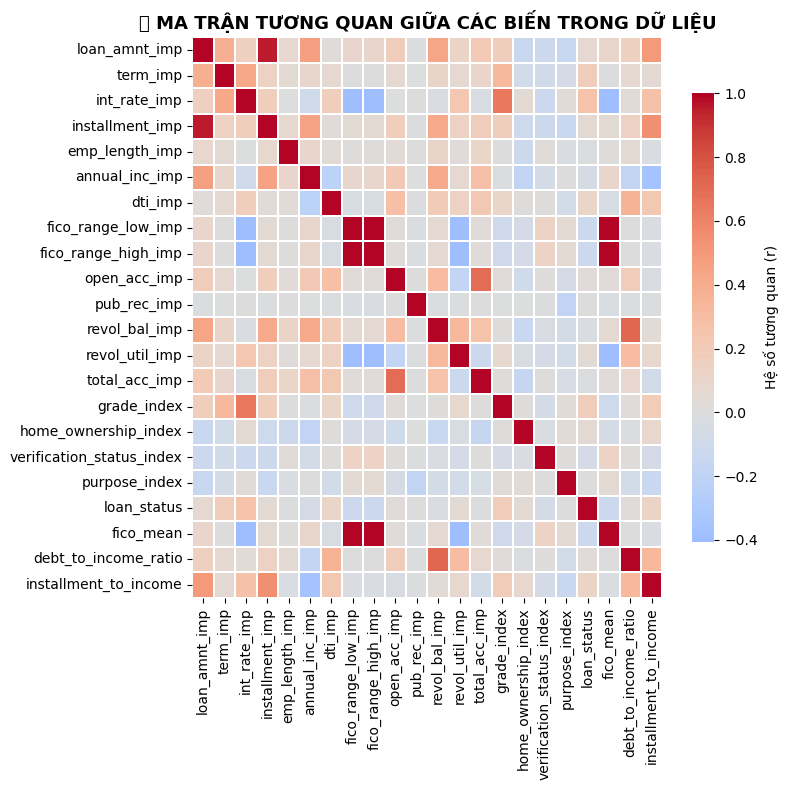

In [199]:

# 🔹 2️⃣ TRỰC QUAN HÓA BẰNG BIỂU ĐỒ NHIỆT
# ================================
plt.figure(figsize=(8, 8))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=False,
    linewidths=0.3,
    cbar_kws={"shrink": 0.8, "label": "Hệ số tương quan (r)"}
)
plt.title("🔆 MA TRẬN TƯƠNG QUAN GIỮA CÁC BIẾN TRONG DỮ LIỆU", fontsize=13, weight='bold')
plt.tight_layout()
plt.show()


🔍 TƯƠNG QUAN GIỮA CÁC BIẾN VỚI loan_status:


loan_status                  1.000000
int_rate_imp                 0.260309
term_imp                     0.181039
grade_index                  0.177537
installment_to_income        0.117157
dti_imp                      0.105845
loan_amnt_imp                0.070528
installment_imp              0.054312
home_ownership_index         0.053350
revol_util_imp               0.049725
open_acc_imp                 0.028777
debt_to_income_ratio         0.026231
pub_rec_imp                  0.002808
purpose_index                0.001988
total_acc_imp               -0.013678
emp_length_imp              -0.013724
revol_bal_imp               -0.020838
annual_inc_imp              -0.057530
verification_status_index   -0.059642
fico_range_low_imp          -0.127588
fico_mean                   -0.127590
fico_range_high_imp         -0.127592
Name: loan_status, dtype: float64

C:\Users\MY PC\AppData\Local\Temp\ipykernel_9096\846569415.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


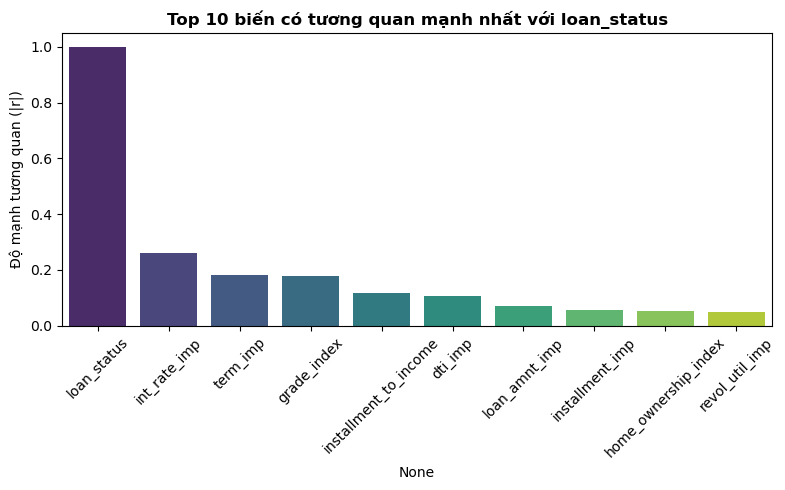

In [201]:

# 🔹 3️⃣ PHÂN TÍCH TƯƠNG QUAN VỚI BIẾN MỤC TIÊU
# ================================
target_corr = corr_matrix["loan_status"].sort_values(ascending=False)
print("\n🔍 TƯƠNG QUAN GIỮA CÁC BIẾN VỚI loan_status:")
display(target_corr)

# ================================
# 🔹 4️⃣ VẼ TOP 10 BIẾN CÓ TƯƠNG QUAN MẠNH NHẤT
# ================================
plt.figure(figsize=(8,5))
sns.barplot(
    x=target_corr.abs().head(10).index,
    y=target_corr.abs().head(10).values,
    palette="viridis"
)
plt.title("Top 10 biến có tương quan mạnh nhất với loan_status", fontsize=12, weight='bold')
plt.xticks(rotation=45)
plt.ylabel("Độ mạnh tương quan (|r|)")
plt.tight_layout()
plt.show()

📘 MA TRẬN TƯƠNG QUAN (10 cột đầu):


,loan_amnt_imp,term_imp,int_rate_imp,installment_imp,emp_length_imp,annual_inc_imp,dti_imp,fico_range_low_imp,fico_range_high_imp,open_acc_imp,...,revol_util_imp,total_acc_imp,grade_index,home_ownership_index,verification_status_index,purpose_index,loan_status,fico_mean,debt_to_income_ratio,installment_to_income
loan_amnt_imp,1.000000,0.385032,0.159202,0.951754,0.088780,0.464905,0.032127,0.098859,0.098860,0.181479,...,0.120365,0.206298,0.168006,-0.138059,-0.129321,-0.148204,0.070528,0.098860,0.151416,0.489951
term_imp,0.385032,1.000000,0.425643,0.140455,0.055983,0.089206,0.071153,0.002085,0.002086,0.070409,...,0.064847,0.099231,0.324009,-0.084898,-0.089662,-0.063451,0.181039,0.002085,0.066318,0.059981
int_rate_imp,0.159202,0.425643,1.000000,0.167522,-0.000557,-0.097211,0.171053,-0.395195,-0.395196,-0.003309,...,0.229829,-0.040745,0.650446,0.048226,-0.126828,0.034291,0.260309,-0.395196,0.041574,0.266492
installment_imp,0.951754,0.140455,0.167522,1.000000,0.075726,0.446925,0.034669,0.048816,0.048816,0.170787,...,0.135406,0.181636,0.171362,-0.111604,-0.123440,-0.136379,0.054312,0.048816,0.142380,0.551923
emp_length_imp,0.088780,0.055983,-0.000557,0.075726,1.000000,0.097166,0.036294,0.016675,0.016673,0.038644,...,0.032313,0.100974,0.002574,-0.124617,0.019455,-0.028972,-0.013724,0.016674,0.053580,-0.031382
annual_inc_imp,0.464905,0.089206,-0.097211,0.446925,0.097166,1.000000,-0.222840,0.089530,0.089532,0.210710,...,0.072476,0.275871,-0.008633,-0.186296,-0.074117,0.005068,-0.057530,0.089531,-0.169531,-0.362377
dti_imp,0.032127,0.071153,0.171053,0.034669,0.036294,-0.222840,1.000000,-0.037248,-0.037248,0.285053,...,0.138389,0.225255,0.101564,0.010248,0.009628,-0.080202,0.105845,-0.037248,0.363824,0.226090
fico_range_low_imp,0.098859,0.002085,-0.395195,0.048816,0.016675,0.089530,-0.037248,1.000000,0.999998,0.028648,...,-0.404775,0.025616,-0.097900,-0.063859,0.132844,0.046308,-0.127588,1.000000,0.002271,-0.029974
fico_range_high_imp,0.098860,0.002086,-0.395196,0.048816,0.016673,0.089532,-0.037248,0.999998,1.000000,0.028648,...,-0.404776,0.025617,-0.097899,-0.063860,0.132846,0.046131,-0.127592,1.000000,0.002270,-0.029976
open_acc_imp,0.181479,0.070409,-0.003309,0.170787,0.038644,0.210710,0.285053,0.028648,0.028648,1.000000,...,-0.183567,0.697376,0.028215,-0.092725,0.007888,-0.056190,0.028777,0.028648,0.179286,-0.031675


C:\Users\MY PC\AppData\Local\Temp\ipykernel_9096\3409463523.py:26: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MY PC\anaconda3\envs\creditrisk\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


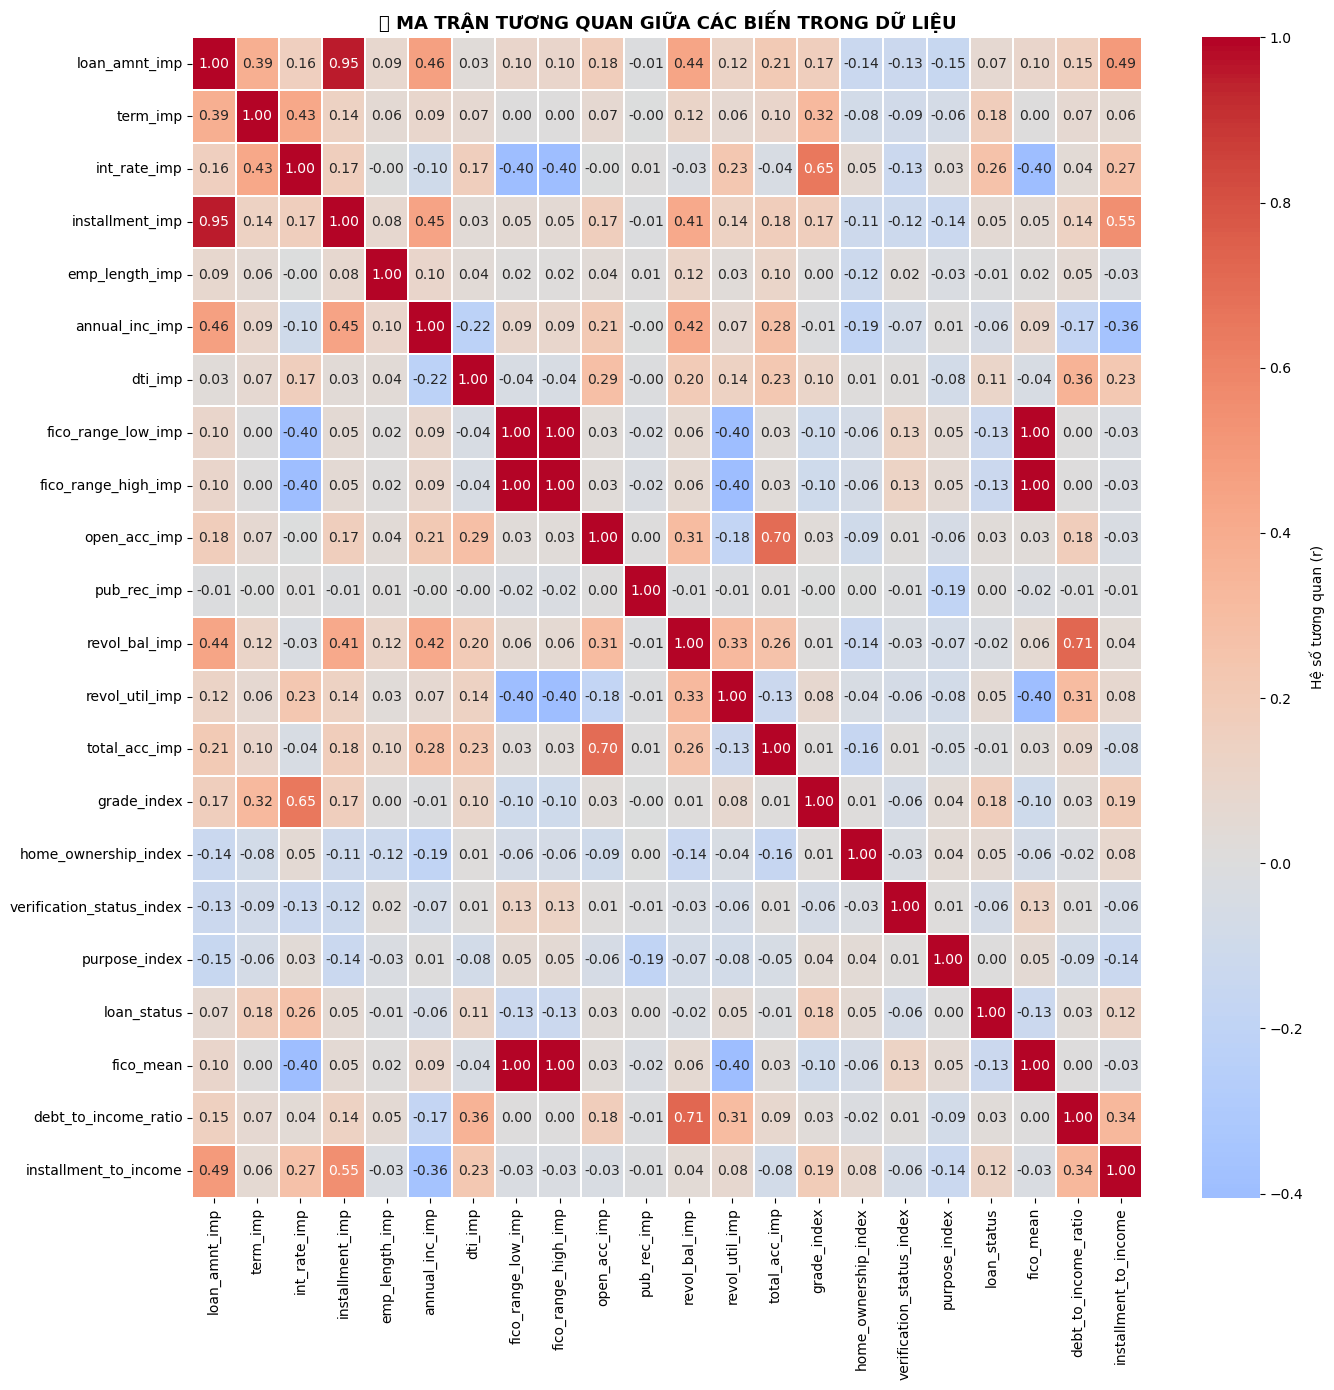


🔍 TƯƠNG QUAN GIỮA CÁC BIẾN VỚI loan_status:


loan_status                  1.000000
int_rate_imp                 0.260309
term_imp                     0.181039
grade_index                  0.177537
installment_to_income        0.117157
dti_imp                      0.105845
loan_amnt_imp                0.070528
installment_imp              0.054312
home_ownership_index         0.053350
revol_util_imp               0.049725
open_acc_imp                 0.028777
debt_to_income_ratio         0.026231
pub_rec_imp                  0.002808
purpose_index                0.001988
total_acc_imp               -0.013678
emp_length_imp              -0.013724
revol_bal_imp               -0.020838
annual_inc_imp              -0.057530
verification_status_index   -0.059642
fico_range_low_imp          -0.127588
fico_mean                   -0.127590
fico_range_high_imp         -0.127592
Name: loan_status, dtype: float64

C:\Users\MY PC\AppData\Local\Temp\ipykernel_9096\3409463523.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


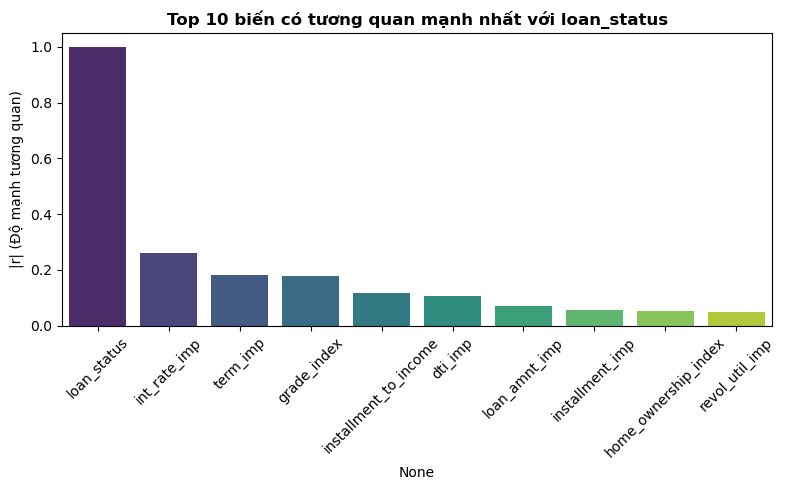

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# 1️⃣ TÍNH TOÁN MA TRẬN TƯƠNG QUAN
# ================================
corr_matrix = df_refined.corr(numeric_only=True)

print("📘 MA TRẬN TƯƠNG QUAN (10 cột đầu):")
display(corr_matrix.head(10))

# ================================
# 2️⃣ VẼ BIỂU ĐỒ NHIỆT (CÓ GIÁ TRỊ CHÚ THÍCH)
# ================================
plt.figure(figsize=(14, 14))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',          # xanh = âm, đỏ = dương
    center=0,
    annot=True,               # ✅ hiển thị giá trị hệ số r
    fmt=".2f",                # làm tròn 2 chữ số
    linewidths=0.3,
    cbar_kws={'label': 'Hệ số tương quan (r)'}
)
plt.title("📈 MA TRẬN TƯƠNG QUAN GIỮA CÁC BIẾN TRONG DỮ LIỆU", fontsize=13, weight='bold')
plt.tight_layout()
plt.show()

# ================================
# 3️⃣ PHÂN TÍCH MỐI TƯƠNG QUAN VỚI loan_status
# ================================
corr_target = corr_matrix['loan_status'].sort_values(ascending=False)

print("\n🔍 TƯƠNG QUAN GIỮA CÁC BIẾN VỚI loan_status:")
display(corr_target)

# ================================
# 4️⃣ VẼ BIỂU ĐỒ TOP 10 BIẾN ẢNH HƯỞNG MẠNH NHẤT
# ================================
plt.figure(figsize=(8,5))
sns.barplot(
    x=corr_target.abs().head(10).index,
    y=corr_target.abs().head(10).values,
    palette="viridis"
)
plt.title("Top 10 biến có tương quan mạnh nhất với loan_status", fontsize=12, weight='bold')
plt.ylabel("|r| (Độ mạnh tương quan)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


import joblib

joblib.dump(log_model, "D:/CreditModels/logistic.pkl")
joblib.dump(rf_model, "D:/CreditModels/random_forest.pkl")
joblib.dump(xgb_model, "D:/CreditModels/xgboost.pkl")

print("📁 Mô hình đã được lưu thành công!")
